# CH1. 탐색적 데이터 분석(EDA)
 - 데이터를 다양한 각도에서 관찰함으로써 데이터를 이해하는 과정

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

from IPython.display import Image

###### 데이터
- Kaggle's House Prices - Advanced Regression Techniques
- 주택정보를 기반으로 거래가격을 예측하는 것을 목표로 하는 getting started competition

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
data = pd.read_csv('C:/data/train.csv'); data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1.1 정형화된 데이터의 요소
 - 테이블 형태 데이터: raw 데이터를 활용 가능한 형태로 변환할 때(즉, 정형화된 형태로 변환할 때) 가장 일반적으로 활용되는 형태로 행과 열이 존재
 
#### 자료형
1. <b>수치형(numeric)</b>: 숫자를 이용해 표현할 수 있는 데이터 <br>
 (1) 연속형(continuous): 일정 범위 안에서 어떤 값이든 취할 수 있는 데이터(ex. 키, 몸무게, LotArea) <br>
 (2) 이산형(discrete): 횟수와 같은 정수 값만 취할 수 있는 데이터 (ex. 방의 수) <br> 
<br>
2. <b>범주형(categorical)</b>: 가능한 범주 안의 값만을 취하는 데이터 (ex. HouseStyle)
 (1) 이진형(binary): 두개의 값만을 갖는 범주형 데이터의 특수한 경우 (ex. 성공여부, 1:성공, 0:실패)
 (2) 순서형(ordial): 값들 사이에 분명한 순위가 있는 범주형 데이터 (ex. 성적)

In [3]:
# 수치형 - 연속형
data['LotArea'] # 주택 부지 면적
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [4]:
# 수치형 - 이산형
data['TotRmsAbvGrd'] # 지상층 방 갯수
data['TotRmsAbvGrd'].value_counts().sort_index()

2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: TotRmsAbvGrd, dtype: int64

In [5]:
# 명목형
data['HouseStyle']
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [6]:
# 명목형 - 이진형
data['CentralAir'] # 중앙에어컨 여부
data['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [7]:
# 명목형 - 순서형
data['OverallQual'].value_counts().sort_index()

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

In [8]:
data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

## 1.3 위치추정
 - <b>대표값</b>을 통해 데이터를 살펴보는 것

1. 평균 = $ \bar{x} = \frac{\sum_{i=1}^n{x_i}} {n} $
 - 가장 기본적인 위치 추정 방법
 
 
2. 절사평균 = $\bar{x} = \frac{\sum_{i=1+1}^{n-p}{x_i}} {n-2p}$ 
 - 크기 순으로 정렬 후, 양 끝에서 일정 개수의 값들을 삭제한 뒤 남은 값들로 구한 평균
 - 극단값 영향을 제거하는 효과가 있음
 
 
3. 가중평균 = $ \bar{x} = \frac{\sum_{i=1}^n{w_ix_i}} {\sum_{i=1}^n{w_i}} $ 
 - 어떤 값들이 본래 다른 값에 비해 큰 변화량을 가질 때, 작은 가중치를 부여함으로써 영향력을 통제하는 것
 - 데이터가 부족한 소수 그룹에 더 높은 가중치를 부여함으로써 보정하는 것


4. 백분위수: 전체 데이터의 $P$%를 아래에 두는 값


5. 중간값: 데이터에서 가장 가운데 위치하는 값
 - 특잇값에 로버스트하다

6. 가중 중간값: 데이터 정렬 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
 - 특잇값에 로버스트하다

<AxesSubplot:>

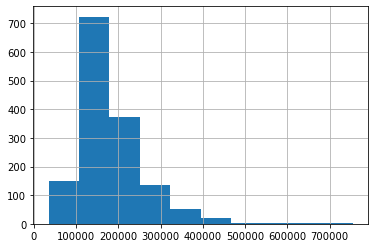

In [9]:
data['SalePrice'].hist()

In [10]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# 절사평균
from scipy.stats import trim_mean

print('절사평균, 10%: ', trim_mean(data['SalePrice'], 0.1)) # 각 끝에서 10% 제외
print('절사평균, 20%: ',trim_mean(data['SalePrice'], 0.2))
print('절사평균, 30%: ',trim_mean(data['SalePrice'], 0.3))

절사평균, 10%:  170783.29109589042
절사평균, 20%:  166531.81392694064
절사평균, 30%:  163804.42465753425


In [12]:
print('평균: ', data['SalePrice'].mean())
print('중간값: ', data['SalePrice'].median())

평균:  180921.19589041095
중간값:  163000.0


## 1.4 변이추정
 - <b>변이(variability)</b>는 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 <b>산포도(dispersion)</b>를 나타냄
 - <b>변이를 측정하고, 이를 줄이고, 실제 변이와 랜덤을 구분하고, 실제 변이의 다양한 요인들을 알아보고, 변이가 있는 상황에서 결정을 내리는 등, 통계의 핵심에 이 변이가 있다.</b>

### 표준편차와 관련된 추정값들

1. 편차: 관측값과 위치 추정값(평균, 중간값 등) 사이의 차이


2. 평균절대편차 = $ \frac{\sum_{i=1}^n{|x_i - \bar{x}|}} {n} $


3. <b>분산</b> = $s^2 = \frac {\sum_{i=1}^n{(x_i - \bar{x})^2}} {n-1}$


4. <b>표준편차</b> = $s = \sqrt{분산}$


5. 중위절대편차(MAD) = $중간값(|x_1 - m|, |x_2 - m|, ..., |x_N - m|)$
 - 분산, 표준편차, 평균절대편차 모두 특잇값과 극단값에 로버스트하지 않다.
 - 분산과 표준편차는 제곱편차를 사용하기 때문에 특히 특잇값에 민감하다. 
 - MAD드는 로버스트한 변이 추정값


In [13]:
# 분산과 표준편차
print('분산: ', data['SalePrice'].var())
print('표준편차: ', data['SalePrice'].std())

분산:  6311111264.297451
표준편차:  79442.50288288663


In [14]:
# MAD 
from statsmodels import robust

print('MAD: ', robust.scale.mad(data['SalePrice']))

MAD:  56338.88430321287


### 백분위수에 기초한 추정

 - 순서통계량: 정렬 데이터를 나타내는 통계량

1. 범위: 최대값과 최소값 차이
 - 특잇값에 매우 민감하여 변이 측정에 유용하지 않음
 

2. <b>사분위범위(IQR)</b>: 25번째 백분위수와 75번째 백분위수 차이
 - 변이를 측정하는 가장 대표적인 방법
 - 양 끝값을 제외하기때문에 로버스트하다
 - 데이터 집합이 클 경우, 근삿값을 사용


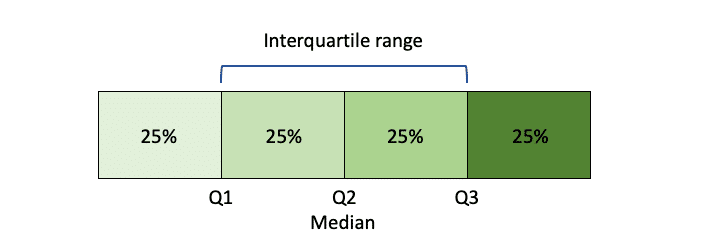

In [15]:
Image("C:/jupyter/[STUDY]statistics for ds/Basic_statistic/JawonMin/iqr_quartiles.png")

In [16]:
print('IQR: ', data['SalePrice'].quantile(0.75) - data['SalePrice'].quantile(0.25))

IQR:  84025.0


In [17]:
data['SalePrice'].describe()
# data['SalePrice'].describe()['75%'] - data['SalePrice'].describe()['25%']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 1.5 .1 백분위수와 상자그림

###### 백분위수
 - 사분위수(quartile), 십분위수(decile)을 주로 사용하여 전체 분포를 알아본다.
 - 꼬리(tail)부분을 묘사하는데 제격

In [41]:
# SalePrice 변수의 백분위수 - 4분위수
data['SalePrice'].quantile([0, 0.25, 0.5, 0.75, 1])

'''
중앙값으로부터 최솟값, Q1, Q3, 최댓값까지의 거리를 봤을 때,
Q1, Q3까지의 거리는 비슷하지만, 최댓값까지의 거리가 굉장히 멀다
따라서 오른쪽으로 꼬리가 긴 분포를 예상할 수 있다.
'''

0.00     34900.0
0.25    129975.0
0.50    163000.0
0.75    214000.0
1.00    755000.0
Name: SalePrice, dtype: float64

In [42]:
data['SalePrice'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

'''
하위 90% 지점의 데이터와 최대값의 차이가 크다. (약 50만)
이상치가 있지 않을까?
'''

0.0     34900.0
0.1    106475.0
0.2    124000.0
0.3    135500.0
0.4    147000.0
0.5    163000.0
0.6    179280.0
0.7    198620.0
0.8    230000.0
0.9    278000.0
1.0    755000.0
Name: SalePrice, dtype: float64

###### 상자그림(Box ploat)
 - 백분위수를 시각화한 것
 - IQR(Interquartile Range, 사분위범위) = Q3 - Q1
   - 분포의 양 끝 1/4을 제외한 범위
 - 수염을 벗어난 값은 이상치(outlier)로 간주

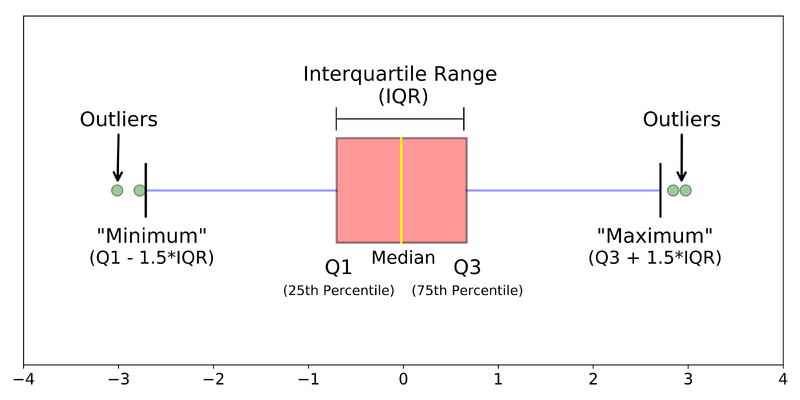

In [21]:
Image("C:/jupyter/[STUDY]statistics for ds/Basic_statistic/JawonMin/boxplot.png")

<AxesSubplot:>

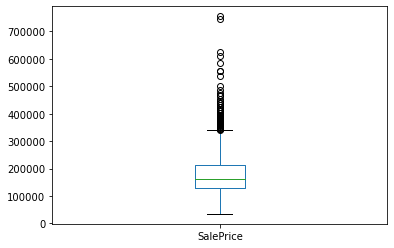

In [20]:
# Box ploat
data['SalePrice'].plot.box()

## 1.5.2 도수분포표와 히스토그램
###### 도수분포표
 - 변수의 범위를 동일한 크기의 구간으로 나눈 다음, 각 구간마다 몇 개의 변수값이 존재하는지 보여줌
 - 도수분포표와 상자그림 모두 구간을 나눠 데이터를 살펴보는 접근방법
   - 백분위수는 각 구간에 같은 수의 데이터가 포함되도록, 도수분포표는 각 구간의 크기가 같도록 나누는 것
 - 구간 크기를 변경해보며 살펴보기
 
 - 히스토그램 -> pd.qcut
 - 상자그림 -> pd.cut 

In [22]:
binnedPrice = pd.cut(data['SalePrice'], 10)
binnedPrice.value_counts().sort_index()

(34179.9, 106910.0]     148
(106910.0, 178920.0]    723
(178920.0, 250930.0]    373
(250930.0, 322940.0]    135
(322940.0, 394950.0]     51
(394950.0, 466960.0]     19
(466960.0, 538970.0]      4
(538970.0, 610980.0]      3
(610980.0, 682990.0]      2
(682990.0, 755000.0]      2
Name: SalePrice, dtype: int64

###### 히스토그램
 - 도수분포표를 시각화하는 방법

'\n오른쪽으로 꼬리가 긴 분포\n50만 이상인 구간부터 빈 구간이 잦음\n'

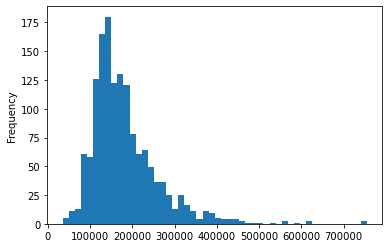

In [50]:
ax = data['SalePrice'].plot.hist(bins=50, figsize=(6, 4))

'''
오른쪽으로 꼬리가 긴 분포
50만 이상인 구간부터 빈 구간이 잦음
'''

## 1.5.3 밀도 그림과 추정
###### 밀도그림
 - 밀도추정: 관측된 데이터 분포를 통해 모집단 분포를 추정하는 것
 - 데이터의 분포를 연속된 선으로 보여줌. 즉, 부드러운 히스토그램이라고 생각할 수 있음

C:\Users\minjw\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


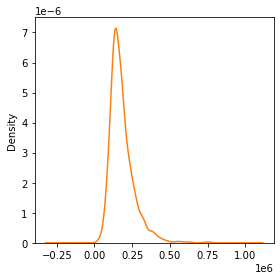

In [24]:
ax = data['SalePrice'].plot.hist(density=True, 
                                    bins=range(1,12), figsize=(4, 4))
data['SalePrice'].plot.density(ax=ax)

plt.tight_layout()
plt.show()

# 1.6 이진 데이터와 범주 데이터 탐색하기
 - 이진변수: 범주 비율 확인
 - 주로 막대 그래프 활용하여 시각화

<AxesSubplot:>

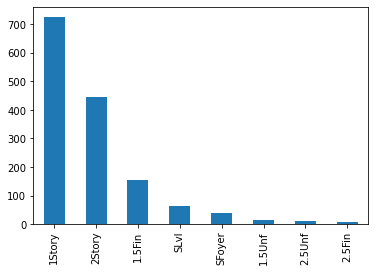

In [25]:
data['HouseStyle'].value_counts().plot.bar()

 - 최빈값: 1Story
 - 기댓값: $ E(X) = \sum{xP(x)} $  *ex. 주사위던지기*
 - 사건이 발생할 확률: 상황이 수없이 반복될 경우 사건이 발생할 비율

# 1.7 상관관계
 
#### 상관계수
 - 상관 행렬을 통해 여러 변수들 사이의 관계를 시각화 할 수 있다.
 - 두 변수의 공분산을 각각의 표준편차의 곱으로 나눈 값
 - -1과 1사이 값을 가지며, <0인 경우 음의 상관관계, >0인경우 양의 상관관계를 갖는다고 함
 
 ###### 피어슨 상관계수
  - 일반적인 상관계수로, 두 수치형 변수 사이의 선형관계를 측정
 
  $$ r = \frac {\sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})}} {(n-1)s_xs_y} $$ 
  
 ###### 스피어만 상관계수
  - 서열형 변수를 포함하고 있는 경우 스피어만 상관계수를 사용
  - 비모수적 접근방법
  - 선형적 상관관계를 나타내는것이 아닌, 단순히 한 변수가 증가할 때 다른 변수의 증감에 대한 관계를 나타냄
  
  
 *참고자료: https://m.blog.naver.com/istech7/50153047118*

In [26]:
import seaborn as sns

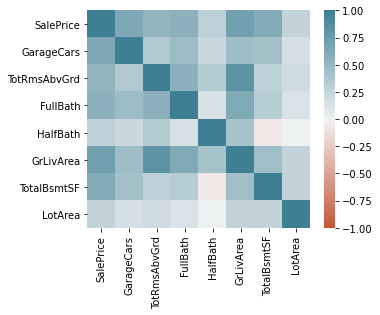

In [27]:
cols = ['SalePrice', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'GrLivArea', 'TotalBsmtSF', 'LotArea']

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(data[cols].corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

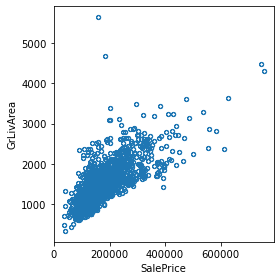

'\n양의 상관성을 보인다\n'

In [28]:
# 산점도 
ax = data.plot.scatter(x='SalePrice', y='GrLivArea', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('SalePrice')
ax.set_ylabel('GrLivArea')

plt.tight_layout()
plt.show()

'''
양의 상관성을 보인다
'''

# 1.8 두 개 이상 변수 탐색하기

## 1.8.1 육각형 구간과 등고선 (수치형 vs 수치형)
 - 데이터의 개수가 많아 산점도로 파악하기 힘든 경우

In [29]:
# temp = data.loc[data['SalePrice']<data['SalePrice'].quantile(0.9)]

temp = data.loc[(data['SalePrice']>data['SalePrice'].quantile(0.25)) &
                (data['SalePrice']<data['SalePrice'].quantile(0.75))]

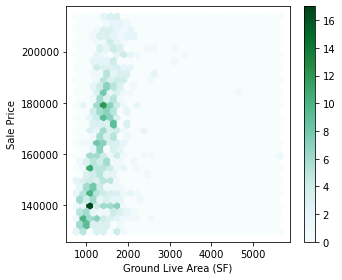

In [30]:
ax = temp.plot.hexbin(x='GrLivArea', y='SalePrice',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Ground Live Area (SF)')
ax.set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

###### 등고선 도표 
 - 등고선 위의 점들은 밀도가 같다
 - 꼭대기쪽으로 갈수록 밀도가 높아진다

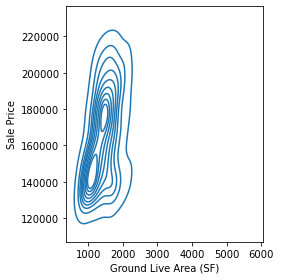

In [31]:
fig, ax = plt.subplots(figsize=(4, 4))
#sns.kdeplot(data=data, x='GrLivArea', y='SalePrice', ax=ax)
sns.kdeplot(data=temp, x='GrLivArea', y='SalePrice', ax=ax)
ax.set_xlabel('Ground Live Area (SF)')
ax.set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [32]:
del temp

## 1.8.2 범주형 변수 대 범주형 변수

###### 분할표
 - 범주별 빈도수 기록한 표
 - 두 범주형 변수를 요약하는 데 효과적

In [33]:
cols = ['OverallQual', 'OverallCond'] # OverallQual: 주택 마감과 자재 상태에 대한 전반적 평가 점수
                                      # OverallCond: 주택의 전반적인 컨디션 평가 점수

crosstab = data[cols].pivot_table(index='OverallQual', columns='OverallCond', 
                                  aggfunc= lambda x: len(x),  # 각 셀에 해당하는 데이터 갯수 
                                  margins=True) # 열과 행의 합계

In [34]:
crosstab.loc[:, 1:9] = crosstab.loc[:, 1:9].div(crosstab['All'], axis=0)

In [35]:
crosstab['All'] = crosstab['All'] / sum(crosstab['All']) ;crosstab

OverallCond,1,2,3,4,5,6,7,8,9,All
OverallQual,,,,,,,,,,
1,0.500000,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.000685
2,NaN,NaN,0.666667,NaN,0.333333,NaN,NaN,NaN,NaN,0.001027
3,NaN,0.100000,0.150000,0.300000,0.100000,0.250000,0.050000,0.050000,NaN,0.006849
4,NaN,0.008621,0.043103,0.172414,0.379310,0.206897,0.163793,0.017241,0.008621,0.039726
5,NaN,0.002519,0.017632,0.052897,0.357683,0.261965,0.224181,0.073048,0.010076,0.135959
6,NaN,NaN,0.016043,0.016043,0.481283,0.221925,0.176471,0.080214,0.008021,0.128082
7,NaN,NaN,0.003135,0.009404,0.774295,0.087774,0.072100,0.025078,0.028213,0.109247
8,NaN,NaN,NaN,0.005952,0.880952,0.041667,0.041667,0.011905,0.017857,0.057534
9,NaN,0.023256,NaN,NaN,0.976744,NaN,NaN,NaN,NaN,0.014726


## 1.8.3 범주형 vs 수치형
 - 상자그림
 - 바이올린플롯
   - 바이올린도표에서는 밀도를 확인할 수 있다

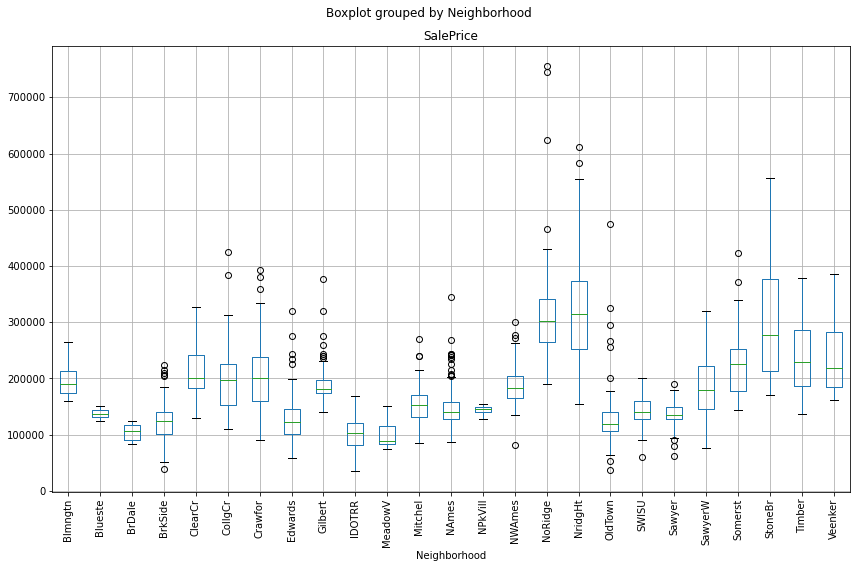

In [36]:
data.boxplot(by='Neighborhood', column='SalePrice', figsize=(12, 8))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\minjw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

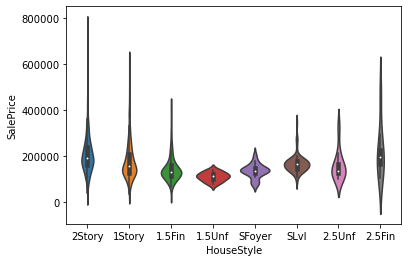

In [37]:
sns.violinplot(data.HouseStyle, data.SalePrice)

## 1.8.4 다변수 시각화하기
 - 조건화 개념을 활용
   - ex. 주택크기와 과세 평가액 간 관계를 볼 때, 지리적 요인을 추가하여 살펴보는것
   
   
 -  **kwargs
   - keyword argument의 줄임말로 (Keyword = value)의 형태로 입력하여 함수 안에서 활용할 수 있는 형태
   
  
 - sns.FacetGrid
   - Multi-plot grid for plotting conditional relationships
 
 
 *참고자료* <br>
 *https://brunch.co.kr/@princox/180 (**kwargs)* <br>
 *https://seaborn.pydata.org/generated/seaborn.FacetGrid.html*

In [38]:
neighbor = ['NoRidge', 'NridgHt']
data_nhbr = data.loc[data.Neighborhood.isin(neighbor), :] ;data_nhbr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1360,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000
1426,1427,60,RL,81.0,10944,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,271000


In [39]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

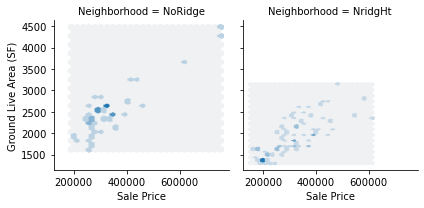

In [40]:
g = sns.FacetGrid(data_nhbr, col='Neighborhood', col_wrap=2)
g.map(hexbin, 'SalePrice', 'GrLivArea')
g.set_axis_labels('Sale Price', 'Ground Live Area (SF)')